<a href="https://colab.research.google.com/github/saerarawas/AAI614_rawas/blob/main/Graded_assignment_1_Rawas_Saera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?

In [2]:
#Check Data Types:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('adult.csv')

# Display the first few rows to understand the data
print(data.head())

# Check data types
print(data.dtypes)

# Convert 'sex' to binary
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

# Convert 'income' to binary
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

# List data types categorized as integer, binary, and categorical again
integer_types = []
binary_types = []
categorical_types = []

for column in data.columns:
    if data[column].dtype == 'int64' or data[column].dtype == 'float64':
        # Check if binary
        unique_vals = data[column].nunique()
        if unique_vals == 2:
            binary_types.append(column)
        else:
            integer_types.append(column)
    else:
        categorical_types.append(column)

print("Integer Types:", integer_types)
print("Binary Types:", binary_types)
print("Categorical Types:", categorical_types)


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

**My data types:**      
Integer Types: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Binary Types: []

Categorical Types: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

**Data types based on their descriptions in this text file description of the data:**
Integer Types: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Binary Types: [**'sex', 'income'**]

Categorical Types: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country',]



2. How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.

In [3]:
# Convert missing values to np.nan
data.replace('?', np.nan, inplace=True)

# Count missing values
missing_values = data.isnull().sum()
print(missing_values)


age                   0
workclass             0
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex               32561
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income            32561
dtype: int64


Missing values are sex (32561) and income (32561)

Individually plot the distributions of capital_gain and capital_loss. Do you think these variables should be transformed into categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).

These values should be transformed into Categorical Variables
Reasoning:


Skewed Distribution: Both capital-gain and capital-loss are highly skewed, with many zeros. This suggests a high level of variability and a non-normal distribution.


Interpretability: Transforming these into categorical variables can make the data easier to interpret, especially in statistical models and visualizations.


Model Performance: For certain machine learning models (like tree-based methods), treating these as categorical can improve performance if the continuous nature of the values isn't as important as the presence or absence of gain/loss.


Transformation Suggestion:


Categorical Variable Creation: Create a binary categorical variable that indicates whether there is a capital gain/loss (yes/no).

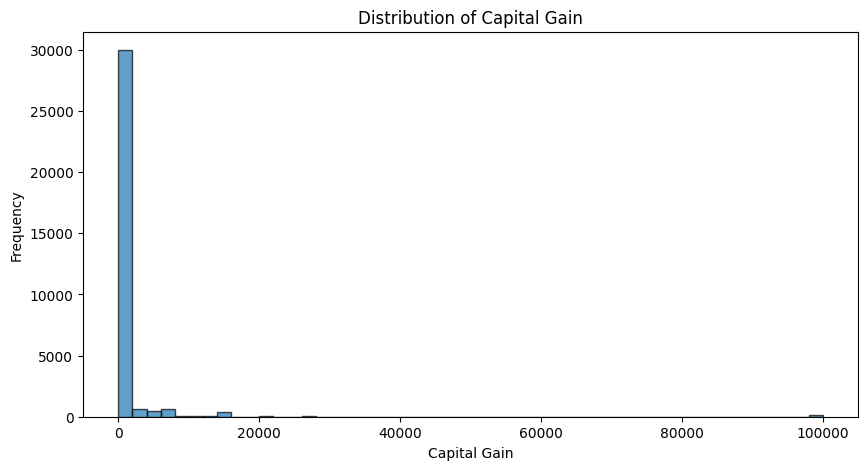

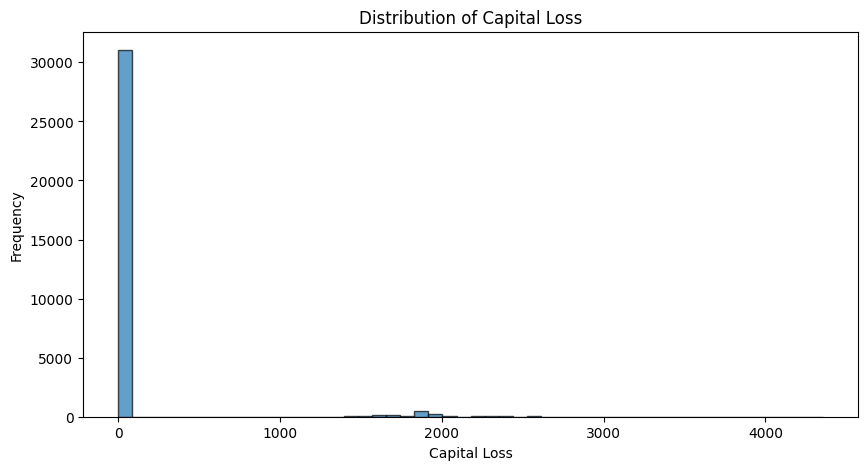

In [4]:
#Plot Distributions:
import matplotlib.pyplot as plt

# Plot capital_gain - Integer
plt.figure(figsize=(10, 5))
plt.hist(data['capital-gain'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

# Plot capital_loss - Integer
plt.figure(figsize=(10, 5))
plt.hist(data['capital-loss'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.show()

# Transforming variables if necessary
data['capital-gain-cat'] = pd.cut(data['capital-gain'], bins=[-1, 0, 5000, 10000, 15000, np.inf], labels=[0, 1, 2, 3, 4])
data['capital-loss-cat'] = pd.cut(data['capital-loss'], bins=[-1, 0, 500, 1000, 1500, np.inf], labels=[0, 1, 2, 3, 4])


**Analysis of Capital Gain and Capital Loss**

**Capital Gain**:
The capital_gain has a large number of observations at zero, with a few observations having significant positive values. This kind of distribution is right-skewed with a heavy tail towards higher values, indicating that while most individuals do not have capital gains, those who do can have quite substantial amounts.


**Capital Loss:**

Similar to capital_gain, capital_loss also often shows many zero values, with fewer observations showing losses. This distribution is also right-skewed, where most individuals do not have capital losses, but those who do can have varying amounts.

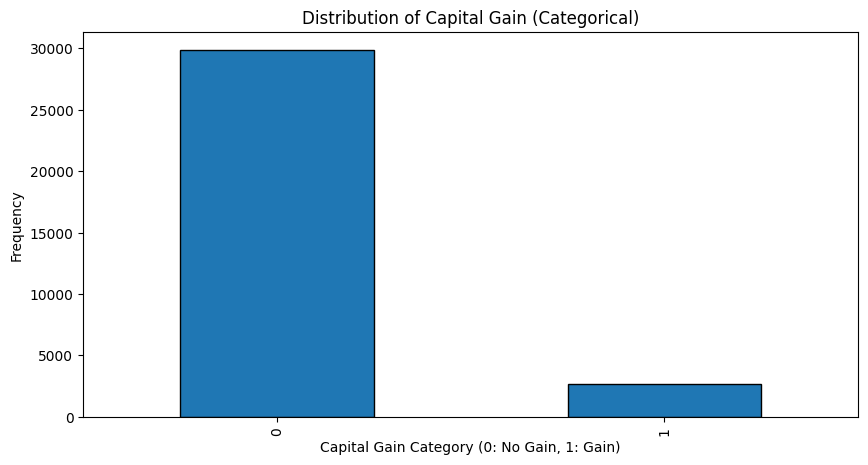

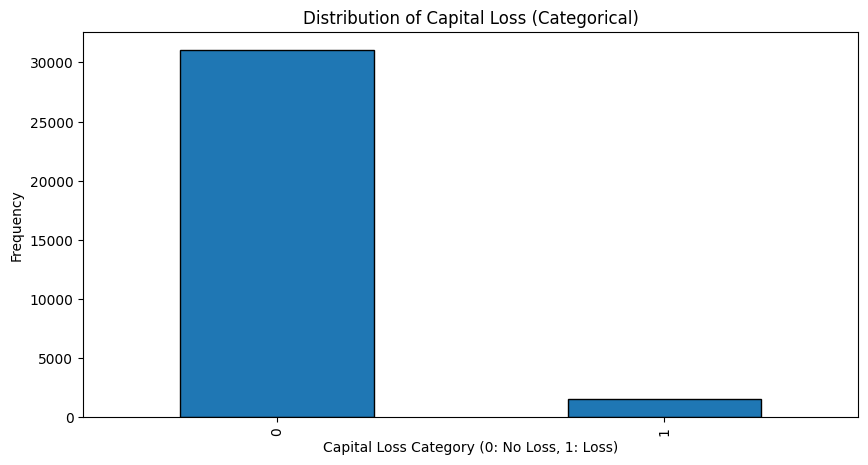

In [6]:
# Binary categorical variable for capital_gain
data['capital_gain_cat'] = np.where(data['capital-gain'] > 0, 1, 0)
# Binary categorical variable for capital_loss
data['capital_loss_cat'] = np.where(data['capital-loss'] > 0, 1, 0)

# Plotting the new binary variables
plt.figure(figsize=(10, 5))
data['capital_gain_cat'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Distribution of Capital Gain (Categorical)')
plt.xlabel('Capital Gain Category (0: No Gain, 1: Gain)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
data['capital_loss_cat'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Distribution of Capital Loss (Categorical)')
plt.xlabel('Capital Loss Category (0: No Loss, 1: Loss)')
plt.ylabel('Frequency')
plt.show()


3. The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that the sample represents based on location (and sometimes, other factors). More information is provided in this text file description of the data.

4. Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.

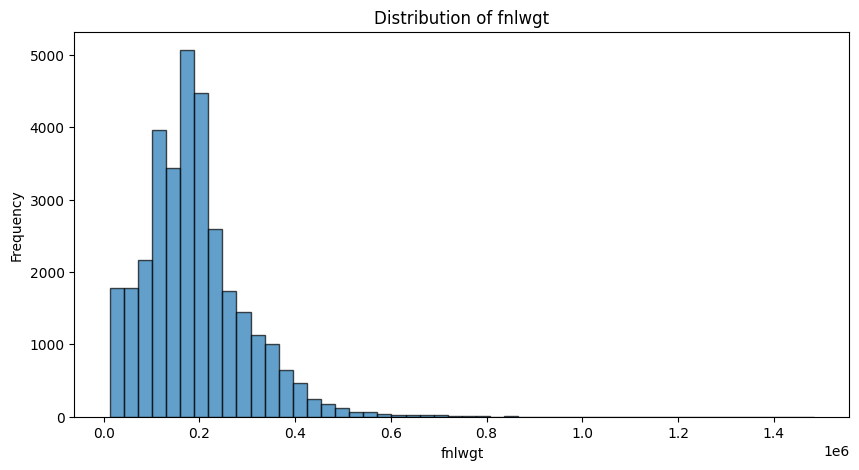

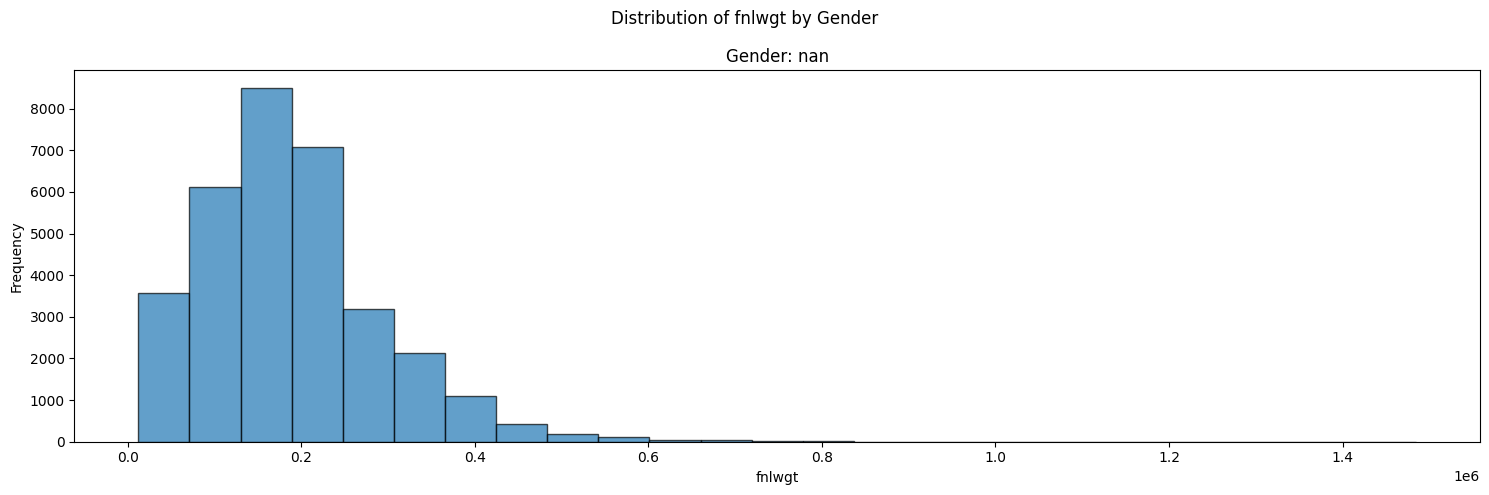

In [9]:
#explore fnlwgt:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(data['fnlwgt'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

# Compare fnlwgt by gender
num_genders = len(data['sex'].unique())
fig, axes = plt.subplots(1, num_genders, figsize=(15, 5), sharey=True) # Ensure at least 1 column
fig.suptitle('Distribution of fnlwgt by Gender')

# If there's only one gender, axes will be a single Axes object, not an array
if num_genders == 1:
    axes.hist(data['fnlwgt'], bins=25, edgecolor='k', alpha=0.7)
    axes.set_title(f'Gender: {data["sex"].unique()[0]}')
    axes.set_xlabel('fnlwgt')
    axes.set_ylabel('Frequency')
else:
    for i, gender in enumerate(data['sex'].unique()):
        axes[i].hist(data[data['sex'] == gender]['fnlwgt'], bins=25, edgecolor='k', alpha=0.7)
        axes[i].set_title(f'Gender: {gender}')
        axes[i].set_xlabel('fnlwgt')
        if i == 0:  # Only label y-axis for the first subplot
            axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.show()


Not Symmetrically Distributed: fnlwgt is right-skewed.

Compare the distribution of the fnlwgt variable between men and women and then analyze the trends.



Unique values in 'sex' column before mapping: [' Male' ' Female']
Unique values in 'sex' column after mapping: [nan]
   sex  fnlwgt
0  NaN   77516
1  NaN   83311
2  NaN  215646
3  NaN  234721
4  NaN  338409
No data for gender: Male
No data for gender: Female


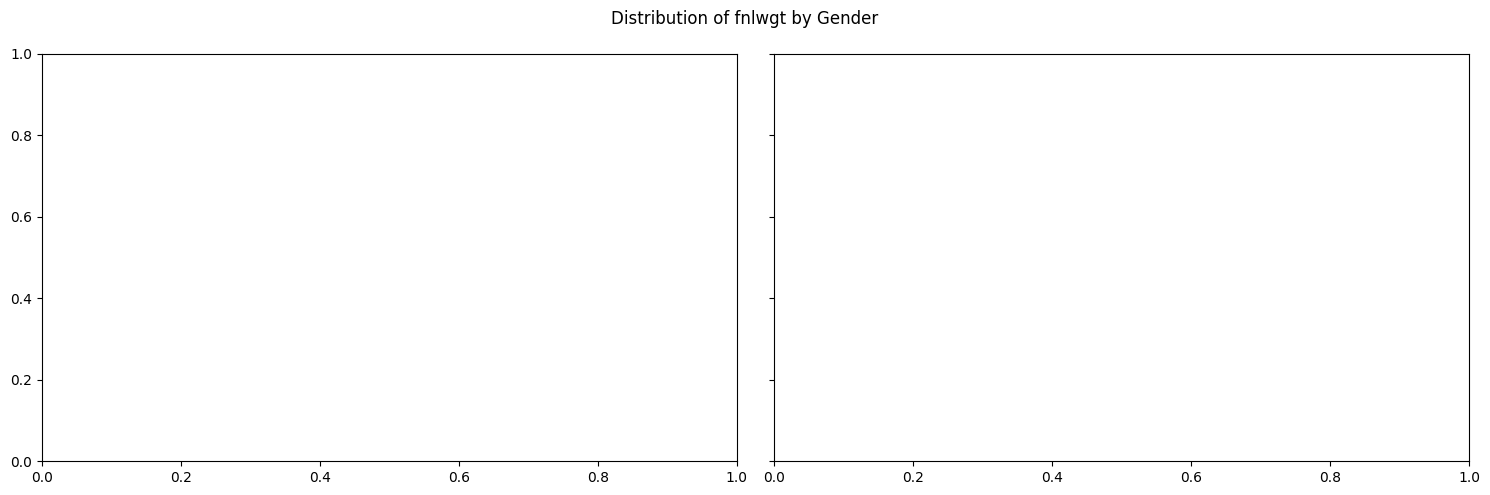

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('adult.csv')

# Check unique values in 'sex' column to verify mapping
print("Unique values in 'sex' column before mapping:", data['sex'].unique())

# Ensuring 'sex' is mapped correctly
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

# Check unique values after mapping to confirm
print("Unique values in 'sex' column after mapping:", data['sex'].unique())

# Verify the dataset after mapping
print(data[['sex', 'fnlwgt']].head())

# Plot the distribution of fnlwgt by gender
genders = {0: 'Male', 1: 'Female'}

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of fnlwgt by Gender')

# Plotting histograms
for i, (gender_code, gender_name) in enumerate(genders.items()):
    subset = data[data['sex'] == gender_code]
    if subset.empty:
        print(f"No data for gender: {gender_name}")
        continue  # Skip empty subsets
    axes[i].hist(subset['fnlwgt'].dropna(), bins=25, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Gender: {gender_name}')
    axes[i].set_xlabel('fnlwgt')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [22]:
# Check unique values in 'sex' column before mapping
print("Unique values in 'sex' column before mapping:", data['sex'].unique())


Unique values in 'sex' column before mapping: [nan]


In [23]:
# Ensuring 'sex' is mapped correctly
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

# Check unique values after mapping to confirm
print("Unique values in 'sex' column after mapping:", data['sex'].unique())


Unique values in 'sex' column after mapping: [nan]


Identifying Outliers:


Use statistical methods such as the Interquartile Range (IQR) to identify outliers.



In [11]:
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['fnlwgt'] < lower_bound) | (data['fnlwgt'] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 992


Code to Handle Outliers:

In [12]:
data.loc[(data['fnlwgt'] < lower_bound) | (data['fnlwgt'] > upper_bound), 'fnlwgt'] = np.nan

In [24]:
#Correlation Analysis
# Calculate correlation matrix
correlation_matrix = data[['age', 'education-num', 'hours-per-week']].corr()
print(correlation_matrix)


                     age  education-num  hours-per-week
age             1.000000       0.036527        0.068756
education-num   0.036527       1.000000        0.148123
hours-per-week  0.068756       0.148123        1.000000


Interpretation:

**Age and Education-num** (0.036527) shows very weak positive correlation and there is almost no linear relationship between age and education level.


**Education-num and Hours-per-week** (0.148123 shows weak positive correlation. There is a slight tendency for individuals with higher education levels to work more hours per week. Although it’s a weak correlation, it’s the strongest among the variables here, indicating a small but notable relationship.


**Age and Hours-per-week**  (0.068756) shows very weak positive correlation. This indicates a very slight tendency that as age increases, hours worked per week might increase marginally. However, this correlation is also very weak.

In [ ]:
#Statistical Testing:

from scipy.stats import pearsonr

# Age and Education_num
corr_age_edu, _ = pearsonr(data['age'], data['education-num'])
print('Pearson correlation between age and education-num:', corr_age_edu)

# Hours_per_week and Education_num
corr_hours_edu, _ = pearsonr(data['hours-per-week'], data['education-num'])
print('Pearson correlation between hours-per-week and education-num:', corr_hours_edu)


In [ ]:
#Correlation by Gender:

male_corr = data[data['sex'] == 'Male'][['age', 'education-num']].corr()
female_corr = data[data['sex'] == 'Female'][['age', 'education-num']].corr()
print('Correlation for Males:\n', male_corr)
print('Correlation for Females:\n', female_corr)


In [ ]:
#Covariance Matrix:

covariance_matrix = data[['education-num', 'hours-per-week']].cov()
print(covariance_matrix)